In [3]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9a6aa5d38d0e2e18201f5937d0f359e3ebb8cc4efe39f4ee4ccde087ebfb74b4
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

In [ ]:
import skfuzzy as fuzz

In [ ]:
import matplotlib.pyplot as plt


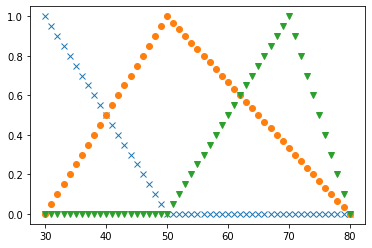

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,80])
fast = fuzz.trimf(x,[50,70,80])
plt.figure()
plt.plot(x,slow,'x',linewidth=1.5,label='Slow')
plt.plot(x,medium,'o',linewidth=1.5,label='Medium')
plt.plot(x,fast,'v',linewidth=1.5,label='Fast')

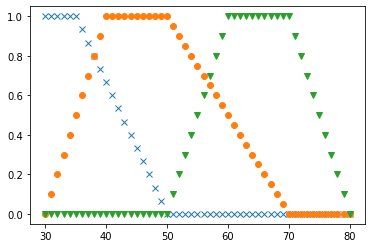

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,30,35,50])
medium = fuzz.trapmf(x,[30,40,50,70])
fast = fuzz.trapmf(x,[50,60,70,80])
plt.figure()
plt.plot(x,slow,'x',linewidth=1.5)
plt.plot(x,medium,'o',linewidth=1.5,label='Medium')
plt.plot(x,fast,'v',linewidth=1.5,label='Fast')

ValueError: ignored

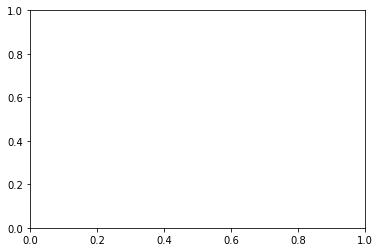

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.gaussmf(30,40,3)
medium = fuzz.gaussmf(30,50,3)
fast = fuzz.gaussmf(50,70,3)
plt.figure()
plt.plot(x,slow,'x',linewidth=1.5,label='Slow')
plt.plot(x,medium,'o',linewidth=1.5,label='Medium')
plt.plot(x,fast,'v',linewidth=1.5,label='Fast')

17.727272727272727


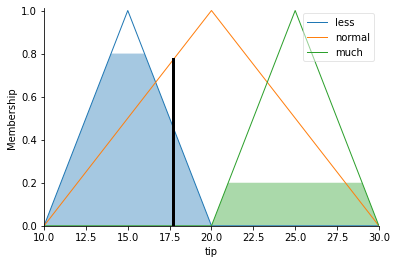

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,15,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,25,30])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule6 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule7 = ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

17.50436046511627


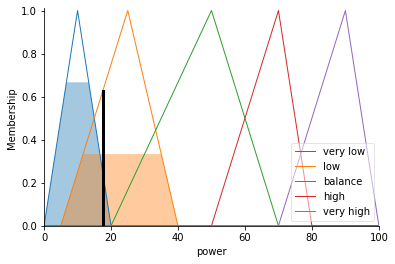

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(200,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[10,30,40])
time['medium'] = fuzz.trimf(time.universe,[20,40,60])
time['slow'] = fuzz.trimf(time.universe,[30,60,120])
time['very slow'] = fuzz.trimf(time.universe,[60,120,180])

rice['less'] = fuzz.trimf(rice.universe,[200,200,500])
rice['less medium'] = fuzz.trimf(rice.universe,[200,300,600])
rice['medium'] = fuzz.trimf(rice.universe,[300,500,700])
rice['much medium'] = fuzz.trimf(rice.universe,[500,800,1000])
rice['much'] = fuzz.trimf(rice.universe,[700,1500,2000])

power['very low'] = fuzz.trimf(power.universe,[0,10,20])
power['low'] = fuzz.trimf(power.universe,[5,25,40])
power['balance'] = fuzz.trimf(power.universe,[20,50,70])
power['high'] = fuzz.trimf(power.universe,[50,70,80])
power['very high'] = fuzz.trimf(power.universe,[70,90,100])

rule1 = ctrl.Rule(time['very fast'] & rice['less'], power['balance'])
rule2 = ctrl.Rule(time['very fast'] & rice['less medium'], power['high'])
rule3 = ctrl.Rule(time['very fast'] & rice['medium'], power['very high'])
rule4 = ctrl.Rule(time['very fast'] & rice['much medium'], power['high'])
rule5 = ctrl.Rule(time['very fast'] & rice['much'], power['high'])
rule6 = ctrl.Rule(time['fast'] & rice['less'], power['balance'])
rule7 = ctrl.Rule(time['fast'] & rice['less medium'], power['balance'])
rule8 = ctrl.Rule(time['fast'] & rice['medium'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much medium'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule11 = ctrl.Rule(time['medium'] & rice['less'], power['balance'])
rule12 = ctrl.Rule(time['medium'] & rice['less medium'], power['balance'])
rule13 = ctrl.Rule(time['medium'] & rice['medium'], power['balance'])
rule14 = ctrl.Rule(time['medium'] & rice['much medium'], power['high'])
rule15 = ctrl.Rule(time['medium'] & rice['much'], power['high'])
rule16 = ctrl.Rule(time['slow'] & rice['less'], power['very low'])
rule17 = ctrl.Rule(time['slow'] & rice['less medium'], power['very low'])
rule18 = ctrl.Rule(time['slow'] & rice['medium'], power['low'])
rule19 = ctrl.Rule(time['slow'] & rice['much medium'], power['balance'])
rule20 = ctrl.Rule(time['slow'] & rice['much'], power['balance'])
rule21 = ctrl.Rule(time['very slow'] & rice['less'], power['very low'])
rule22 = ctrl.Rule(time['very slow'] & rice['less medium'], power['very low'])
rule23 = ctrl.Rule(time['very slow'] & rice['medium'], power['very low'])
rule24 = ctrl.Rule(time['very slow'] & rice['much medium'], power['low'])
rule25 = ctrl.Rule(time['very slow'] & rice['much'], power['balance'])

powerpercent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerpercent = ctrl.ControlSystemSimulation(powerpercent_ctrl)
powerpercent.input['time'] = 100
powerpercent.input['rice'] = 500
powerpercent.compute()
print(powerpercent.output['power'])
power.view(sim=powerpercent)